<a href="https://colab.research.google.com/github/lipakshipanda/Spectrum-Internship-Drive-2023/blob/main/Copy_of_task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the below cell to download the csv and file into your colab/jupyter notebook and start working with it. You will be needing this for completing the task.

In [1]:
!wget https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv

--2023-12-09 06:49:35--  https://raw.githubusercontent.com/Spectrum-CETB/Data-Science-AI/main/Datasets/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  59.76K  --.-KB/s    in 0.02s   

2023-12-09 06:49:35 (3.76 MB/s) - ‘titanic.csv’ saved [61194/61194]



## Task: Machine Learning Model for Titanic Survival Prediction

### Introduction:
In this task, you will work on the Titanic dataset, a famous dataset in the field of machine learning. The goal is to build a machine learning model that predicts whether a passenger on the Titanic survived or not. The dataset contains various features, and you will need to perform several key tasks in the machine learning pipeline.

### Instructions:

1. **Data Preprocessing:**
    - Load the Titanic dataset.
    - Handle missing values in the dataset.
    - Encode categorical features (e.g., one-hot encoding or label encoding).
    - Split the data into training and testing sets.

2. **Exploratory Data Analysis (EDA):**
    - Perform exploratory data analysis to understand the dataset.
    - Visualize the data to gain insights into passenger demographics and their survival rates.
    - Identify any interesting patterns or correlations between features and survival.

3. **Outlier Detection and Removal:**
    - Detect and deal with outliers in the dataset.
    - Explain the approach you used for outlier detection and removal.

4. **Data Extraction:**
    - Create any new features or transformations that you believe might be useful for improving the model's performance.
    - Justify the choice of these new features or transformations.

5. **Model Selection:**
    - Choose a machine learning algorithm for classification. Suggest at least three common classification algorithms (e.g., Logistic Regression, Random Forest, Support Vector Machine).
    - Explain your rationale for selecting the chosen algorithms.

6. **Model Building and Hyperparameter Tuning:**
    - Implement the selected machine learning algorithms and train them on the training data.
    - Perform hyperparameter tuning for each algorithm to optimize their performance.
    - Clearly specify the hyperparameters you tuned and the methodology used.

7. **Model Evaluation:**
    - Evaluate the performance of each model using accuracy as the primary metric.
    - Compare the models and choose the best-performing model for the final predictions.
    - Report the accuracy score for the chosen model on the testing data.

8. **Conclusion:**
    - Summarize your findings and the key steps in the machine learning pipeline.
    - Reflect on any challenges you encountered and how you addressed them.

### Submission:
Submit your code, along with a report explaining the steps you took, the reasoning behind your choices, and the accuracy score achieved on the test dataset.

Good luck, and may your machine learning model effectively predict Titanic passenger survival!


In [2]:
from numpy import False_
import pandas as pd
titu = pd.read_csv("titanic.csv")
missing_values = titu.isnull().sum()
print(missing_values)
titanic_data = pd.get_dummies(titu, columns=['Embarked'], prefix=['Embarked'])
from sklearn.model_selection import train_test_split
# Separate the target variable ('Survived') from the features
X = titanic_data.drop(columns=['Survived'])
y = titanic_data['Survived']  # Target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin  Embarked_C  Embarked_Q  Embarked_S
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN           0           0           1
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85           1           0           0
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN           0           0           1
3              4         1       1                                        Fu

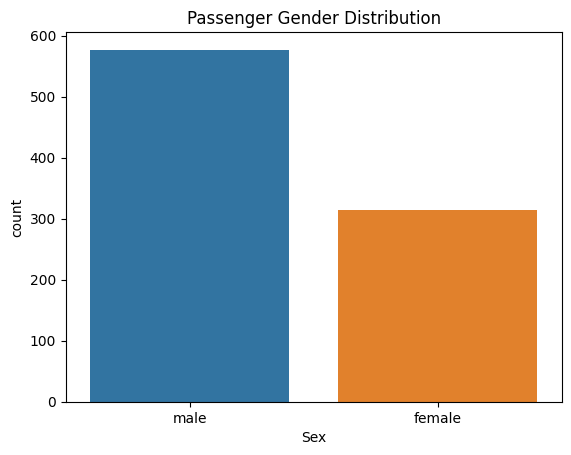

In [3]:
#EDA
outliers_str = titanic_data.to_string(index=True)
print(outliers_str)
summary = titanic_data.describe().to_string(index=True)
print(summary)
import matplotlib.pyplot as plt
import seaborn as sns
# Countplot for categorical variables
sns.countplot(titu, x='Sex' )
plt.title('Passenger Gender Distribution')
plt.show()

In [4]:
import statistics

# Calculate the median of the 'Age' column
median_age = statistics.median(titu['Age'])

# Fill missing values in the 'Age' column with the median
titu['Age'].fillna(median_age, inplace=True)

# Calculate the most frequent 'Embarked' value and fill missing values with it
most_frequent_embarked = titu['Embarked'].mode()[0]
titu['Embarked'].fillna(most_frequent_embarked, inplace=True)

# Check the number of missing values in the 'Age' column
titu['Age'].isnull().sum()


177

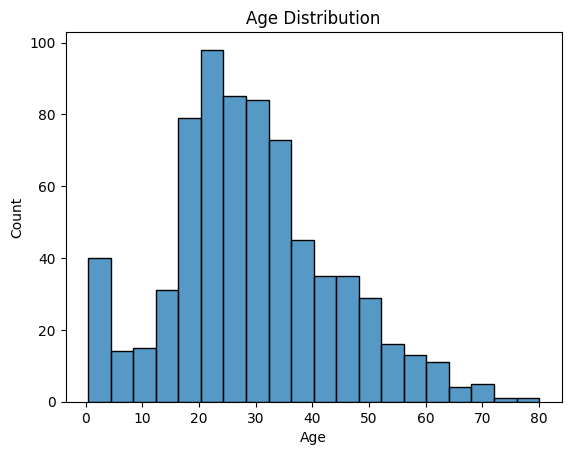

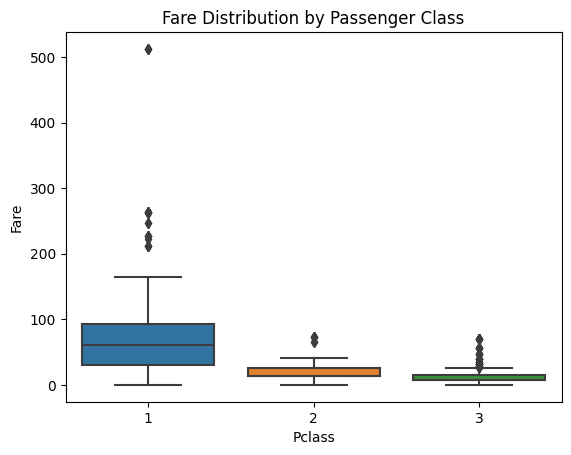

<ipython-input-5-35b11e052cdc>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_data.corr()


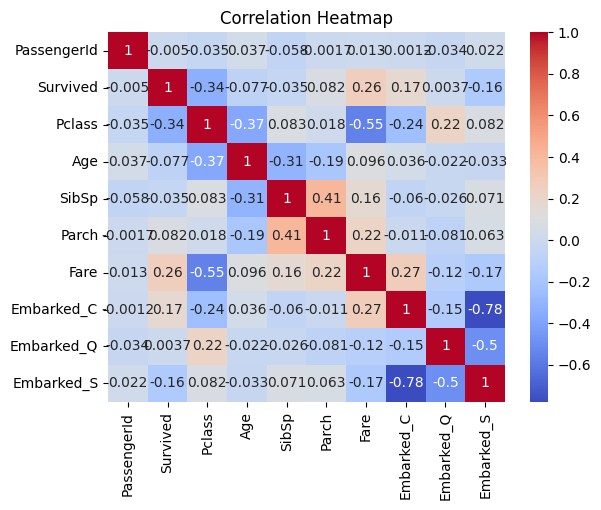

In [5]:
# Histogram for continuous variables
sns.histplot(titanic_data['Age'], bins=20)
plt.title('Age Distribution')
plt.show()
# Boxplot for understanding the distribution of a variable
sns.boxplot(x='Pclass', y='Fare', data=titanic_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()
# Correlation matrix for numeric features
correlation_matrix = titanic_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

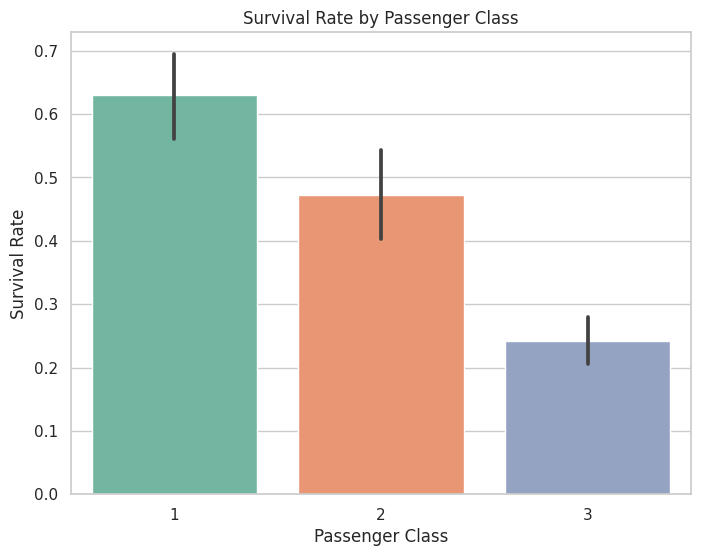

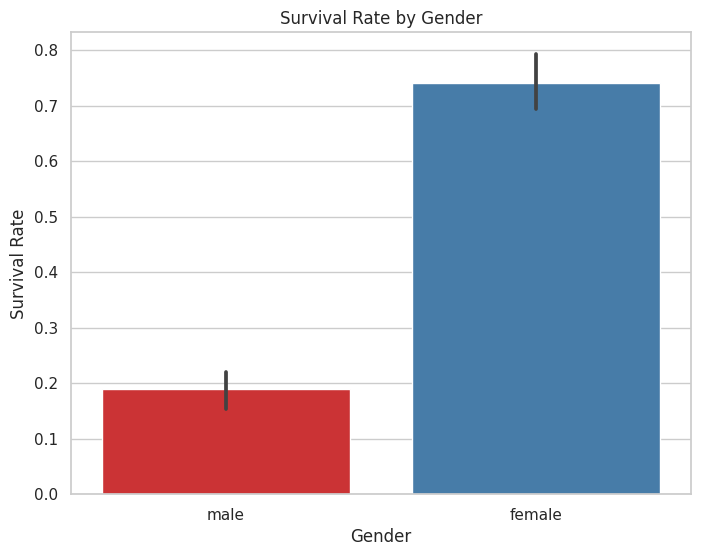

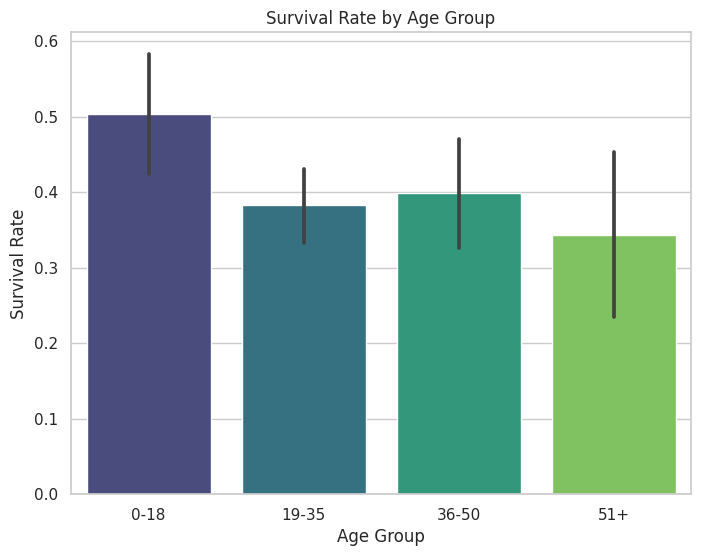

In [6]:
# Set the style for Seaborn plots (optional)
sns.set(style='whitegrid')
# 1. Survival Rate by Passenger Class (Pclass)
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=titanic_data, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
# 2. Survival Rate by Gender (Sex)
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=titanic_data, palette='Set1')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()
# 3. Survival Rate by Age Group
# Create age groups for better visualization
age_bins = [0, 18, 35, 50, 80]
age_labels = ['0-18', '19-35', '36-50', '51+']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)
plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='Survived', data=titanic_data, palette='viridis')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

In [7]:
#Outlier Detection and Removal
from scipy import stats
import numpy as np
z_scores = stats.zscore(titanic_data['Fare'])
threshold = 2  # Adjust this threshold as needed
outliers = titanic_data[abs(z_scores) > threshold]
from scipy.stats.mstats import winsorize
titanic_data['Fare'] = winsorize(titanic_data['Fare'], limits=[0.05, 0.05])
titanic_data['Fare'] = np.log1p(titanic_data['Fare'])
titanic_data = titanic_data[(z_scores < threshold) & (z_scores > -threshold)]
outliers = titanic_data[abs(z_scores) > threshold]

<ipython-input-7-7a1808e207c3>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = titanic_data[abs(z_scores) > threshold]


In [8]:
#Data Extraction
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.')
age_bins = [0, 18, 35, 50, 80]
age_labels = ['0-18', '19-35', '36-50', '51+']
titanic_data['AgeGroup'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels)
fare_bins = [0, 10, 30, 100, 1000]
fare_labels = ['0-10', '11-30', '31-100', '100+']
titanic_data['FareCategory'] = pd.cut(titanic_data['Fare'], bins=fare_bins, labels=fare_labels)
titanic_data['Deck'] = titanic_data['Cabin'].str[0]
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 0).astype(int)
titanic_data['TicketPrefix'] = titanic_data['Ticket'].str.extract('([A-Za-z]+)')
titanic_data['Pclass_Age'] = titanic_data['Pclass'] * titanic_data['Age']


<ipython-input-8-9bc6c3fff779>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
<ipython-input-8-9bc6c3fff779>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data['Title'] = titanic_data['Name'].str.extract(' ([A-Za-z]+)\.')
<ipython-input-8-9bc6c3fff779>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# ***model selection***

In [9]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titu = pd.read_csv('titanic.csv')

#Handle missing values
titu.dropna(inplace=True)

# Convert categorical features to numerical
titu['Sex'] = titu['Sex'].map({'male': 0, 'female': 1})
titu['Embarked'] = titu['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
thor = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
vision = 'Survived'

# Split into training and testing sets
X = titu[thor]
y = titu[vision]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model selection
svc_model = SVC()
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train and evaluate models
wanda = [svc_model, logistic_model, rf_model]
steve = ['Support Vector Classifier', 'Logistic Regression', 'Random Forest']

best_model = None
best_accuracy = 0

for model, model_name in zip(wanda, steve):
    model.fit(X_train, y_train)
    natasha = model.predict(X_test)
    accuracy = accuracy_score(y_test,natasha)
    print(f'Accuracy for {model_name}: {accuracy}')

    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# the best model
print(f'Best Model: {steve[wanda.index(best_model)]} with Accuracy {best_accuracy}')

# Make predictions for new passengers using the chosen model
bruce= pd.DataFrame([[3, 1, 22, 1, 0, 7.25, 1]])  # Replace with the actual feature values for the new passenger
hulk = best_model.predict(bruce)
print('Survival Prediction for the New Passenger:', hulk)



Accuracy for Support Vector Classifier: 0.6216216216216216
Accuracy for Logistic Regression: 0.7567567567567568
Accuracy for Random Forest: 0.7297297297297297
Best Model: Logistic Regression with Accuracy 0.7567567567567568
Survival Prediction for the New Passenger: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **summarizing the model and challenges faced**
The titanic data datasheet is really a amazing explorative machine learnig project with use of data science

the process in which I started is that first handling the missing valves
and then the toughest part explorative data analysis

challenge: choosing the most appropriate categorical features that fit into my model

approach:i found a suggustion on google scholar where it had explained how to change the categorical features to numerical

challenge: earlier i had 3 different cell for the 3 model i chose. but that created a trouble for me to analyse and compare their accuracy and choose the best model

approach:i tried the knowledge of using conditional statement which i had use in the programming lab in college with some other changes in python the code did worked.    
  



